In [2]:
using Polynomials, Plots, Interact
plotlyjs();

In [3]:
p = poly([-4,-2,-1,1,3]) # create a polynomial with these roots
xlim = (-4.1,3.1)
plot(t->p(t), xlim...)   # plot the polynomial
r = roots(p)             
scatter!(r,zeros(r))     # plot the computed roots (just to check)

In [5]:
p # Show the polynomial

Poly(24 + 10x - 27x^2 - 11x^3 + 3x^4 + x^5)

In [6]:
# Function to generate data from the polynormal.
function gen_data(p, m, η)
    srand(0)
    t = randn(m)
    noise = randn(m); noise *= η/norm(noise)
    b = p(t) + noise;
    return (t, b)  
end;

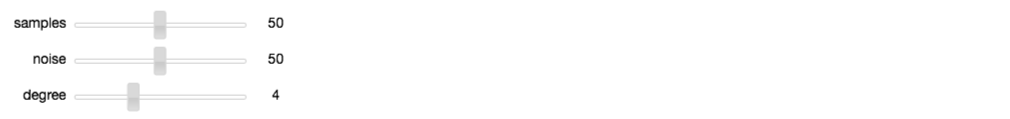

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"samples",50,0:100,"d",true)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"noise",50,0:100,"d",true)

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"degree",5,1:10,"d",true)

In [16]:
t = b = []
@manipulate for m=slider(0:100, label="samples"), η=slider(0:100, label="noise"), d=slider(1:10,label="degree")
    t, b = gen_data(p, m, η)
    pp = polyfit(t,b,d);
    scatter(t,b,xlim=xlim,ylim=(-100,60))
    plot!(t->pp(t), xlim...)
end

In [17]:
# Compute the fit manually.
m = 50; η = 50.0; d = 4
(t, b) = gen_data(p, m, η)
A = [ t[i]^k for i = 1:m, k = 0:d ]
c = A\b
pp = Poly(c)
plot!(t->pp(t),xlim...,ylim=(-100,60))